## **📌 Fraud Detection in Financial Transactions**
### **📝 Project Overview**
Financial fraud is a growing concern, leading to billions in losses annually. Detecting fraudulent transactions is crucial for ensuring the security of financial systems. In this project, we develop a **machine learning-based fraud detection model** using the **Kaggle Credit Card Fraud Detection Dataset** to classify transactions as **fraudulent (1)** or **legitimate (0)**.

### **🎯 Objectives**
- Analyze and preprocess financial transaction data.
- Handle class imbalance using techniques like **SMOTE or Undersampling**.
- Train and evaluate multiple **machine learning models** (Logistic Regression, Random Forest, XGBoost, etc.).
- Identify key features that contribute to fraud detection.
- Optimize the model for **high recall** (minimizing false negatives).
- Provide **actionable insights** for fraud prevention.

### **📂 Dataset Description**
- **Source**: [Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- **Features:**
  - `Time`: Time elapsed since the first transaction.
  - `Amount`: Transaction amount.
  - `V1 - V28`: PCA-transformed numerical features.
  - `Class`: **0 → Legitimate transaction, 1 → Fraudulent transaction**.

### **⚡ Challenges in Fraud Detection**
- **Highly Imbalanced Data:** Fraudulent transactions are **less than 0.2%** of total transactions.
- **Anonymized Features:** Actual transaction details are unavailable due to privacy concerns.
- **Cost of Misclassification:** False negatives (missed frauds) are more costly than false positives.

### **🛠️ Tools & Technologies**
- **Programming Language:** Python  
- **Libraries:** `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, `imbalanced-learn`  
- **Machine Learning Models:** Logistic Regression, Random Forest, XGBoost, Neural Networks  
- **Evaluation Metrics:** Precision, Recall, F1-score, AUC-ROC  

---

### **✅ Expected Outcomes**
- A **highly accurate fraud detection model** with optimized recall.
- Insights into transaction patterns that differentiate fraud from legitimate transactions.
- A framework for financial institutions to integrate ML-based fraud detection.

---

### **📌 Next Steps**
✅ Load and explore the dataset 🔍  
✅ Handle class imbalance ⚖️  
✅ Train and evaluate models 🤖  
✅ Optimize performance and extract insights 📊  

### **1.Import Necessary Libraries**

In [1]:
# Data Handling & Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

### **2. Load & Explore the Dataset**

#### **2.1 Load the Data**

In [2]:
# Load the dataset
df = pd.read_csv("creditcard.csv")

# Display first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### **2.2 Check Dataset Information**

In [3]:
# Check dataset structure and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### **2.3 Check for Missing Values**

In [4]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### **2.4 Explore the Distribution of Classes (Fraud vs. Legitimate)**

Class
0    284315
1       492
Name: count, dtype: int64


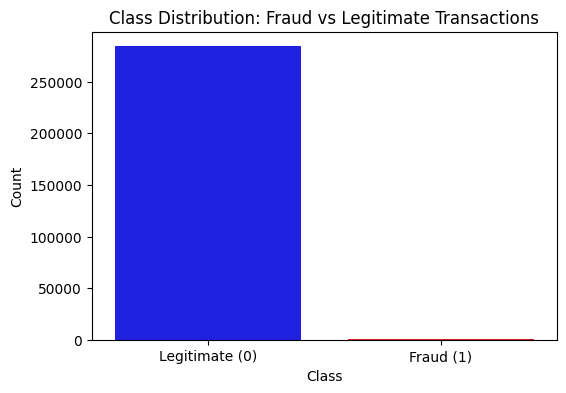

In [5]:
# Count of fraud vs. legitimate transactions
fraud_count = df["Class"].value_counts()

# Print class distribution
print(fraud_count)

# Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_count.index, y=fraud_count.values, palette=["blue", "red"])
plt.xticks(ticks=[0,1], labels=["Legitimate (0)", "Fraud (1)"])
plt.ylabel("Count")
plt.title("Class Distribution: Fraud vs Legitimate Transactions")
plt.show()

#### **2.5 Summary Statistics**

In [6]:
# Get statistical summary of numerical features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### **2.6 Check Correlation Between Features**

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

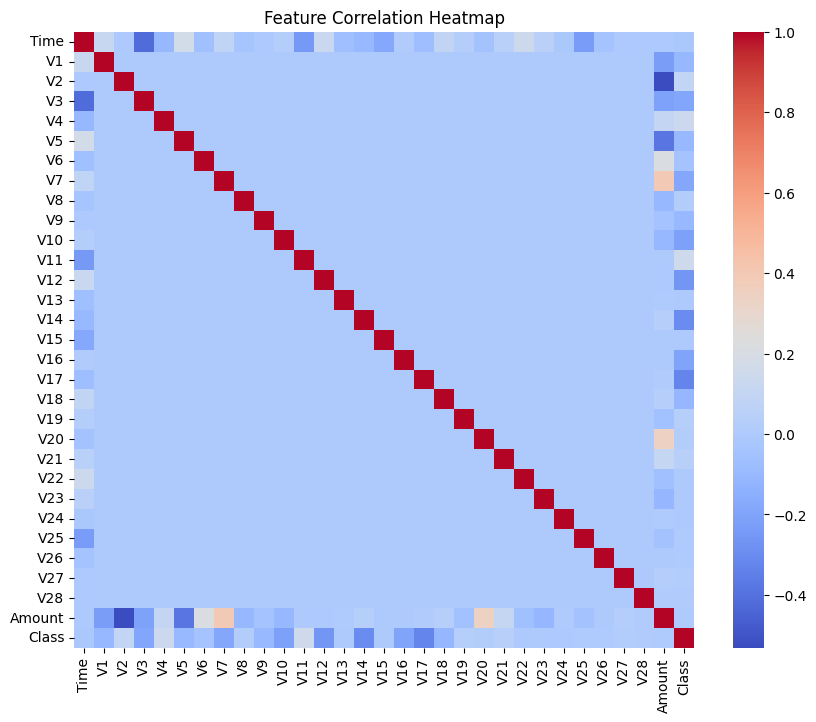

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


### **Key Observations from the Heatmap**
1. **Diagonal Line (Perfect Correlation)**:
   - The diagonal reflects perfect correlation (`correlation = 1`) between the same variables (e.g., `V1` with `V1`), which is expected.

2. **Weak Correlation of `Class` with Features**:
   - `Class` (fraud or legitimate) shows some positive and negative correlations with specific features (e.g., `V4`, `V11`, 'V14' , and `V17`), but most features have low correlation.

3. **Time and Amount**:
   - `Time` and `Amount` show relatively low correlation with the `Class`. However, these features might still be meaningful for fraud detection, so further analysis is needed.

4. **Minimal Multi-Collinearity**:
   - Due to PCA transformation (`V1` to `V28`), most features are decorrelated, which is beneficial for machine learning models.

---

### **Necessary Steps for EDA**
Based on these observations, here are the recommended steps:

#### **1. Focus on Features with High Correlation to `Class`**
- Features like `V4`, `V11`, `V17`, and others with moderate correlation to `Class` should be further analyzed.
- **Next Step**: Plot distributions for these features to understand how they differ for fraud (`Class=1`) vs. legitimate (`Class=0`) transactions.

---

#### **2. Analyze Time and Amount**
- Since `Time` and `Amount` have low correlation with `Class`, further investigation is necessary:
  - Check the distribution of `Time` for fraud vs. legitimate transactions.
  - Check if `Amount` has any specific patterns for fraud cases.
---

#### **3. Handle Potential Skewness**
- Features like `Amount` and `Time` could be highly skewed. If skewness is observed, apply transformations such as **log transformation** to normalize the data.

---

#### **4. Explore Fraud Patterns**
- Explore feature relationships that could indicate fraud (e.g., `Amount` vs. `V4` for fraud and legitimate transactions).

---

#### **5. Identify Outliers**
- Use boxplots to detect outliers in features like `Amount` and correlated features.

---

#### **6. Feature Engineering**
- Use the findings from EDA to create meaningful features. For example:
  - Bin `Amount` into ranges (e.g., low, medium, high).
  - Convert `Time` into cyclical features using sine and cosine transformations.

#### **2.7 Focus on Features with High Correlation to Class**

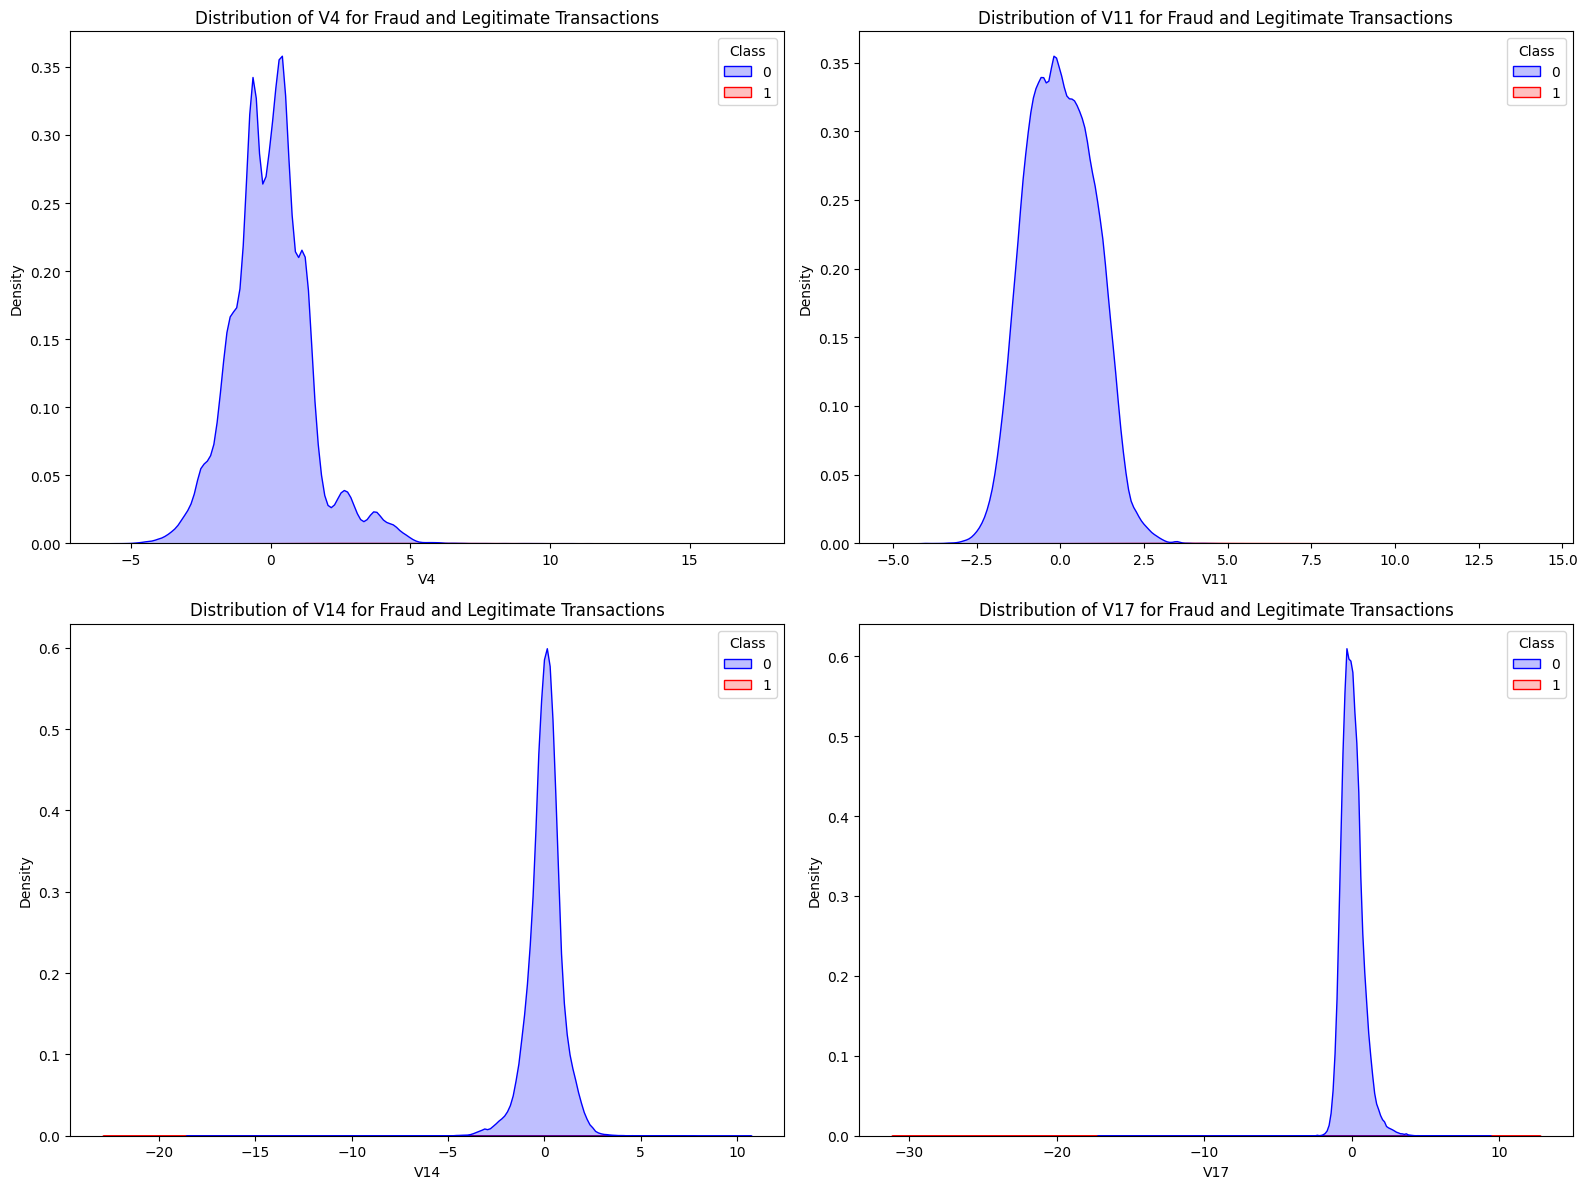

In [10]:
# List of important features
important_features = ['V4', 'V11', 'V14', 'V17']

# Set up the subplot grid
plt.figure(figsize=(16, 12))  # Adjust figure size as needed
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.kdeplot(data=df, x=feature, hue='Class', fill=True, palette=['blue', 'red'])
    plt.title(f"Distribution of {feature} for Fraud and Legitimate Transactions")
    plt.xlabel(feature)
    plt.ylabel("Density")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### **Interpretation of KDE Plots**
1. **General Trend**:
   - The blue area corresponds to **legitimate transactions (`Class=0`)**, while the red area corresponds to **fraudulent transactions (`Class=1`)**.
   - These plots show the density distribution of the selected features for both classes.

2. **Feature-by-Feature Insights**:
   - **`V4`**:
     - There is a slight separation between fraud and legitimate transactions.
     - Fraudulent transactions seem to peak in specific regions where legitimate transactions are less dense.
   - **`V11`**:
     - Fraudulent transactions overlap significantly with legitimate ones, but there's a noticeable density difference in specific regions.
   - **`V14` and `V17`**:
     - Fraud transactions show extreme values (outliers) compared to legitimate ones.
     - These features may hold strong predictive power for distinguishing fraud.

3. **Class Imbalance**:
   - Fraudulent transactions (`Class=1`) appear as much smaller red peaks compared to the dominant legitimate transactions (`Class=0`), confirming the significant **class imbalance** in the dataset.

---

### **Next Steps**
Based on these KDE plots, here’s what you should do:

#### **1. Focus on Key Features**
- The features `V4`, `V11`, `V14`, and `V17` seem relevant for distinguishing fraud from legitimate transactions.
- Retain these features during the modeling stage.

#### **2. Consider Outlier Handling**
- Features like `V14` and `V17` show extreme values for fraud transactions. These may need special handling:
  - Use **robust scaling** to reduce the impact of outliers.
  - Alternatively, cap extreme values using percentiles.

##### **2.7.1 Outlier Handling**

**Visualize Outliers with Boxplots**

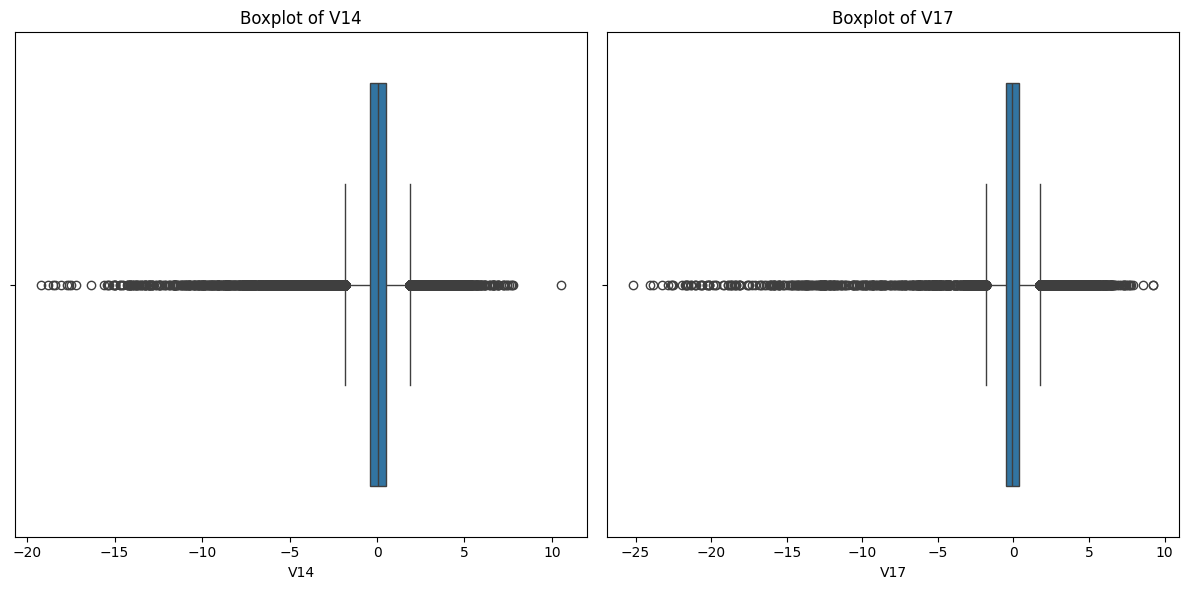

In [15]:
# Visualize boxplots for V14 and V17
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['V14'])
plt.title("Boxplot of V14")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['V17'])
plt.title("Boxplot of V17")

plt.tight_layout()
plt.show()

**Define Outlier Thresholds**

In [16]:
# Calculate IQR for V14 and V17
def detect_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

v14_lower, v14_upper = detect_outliers('V14')
v17_lower, v17_upper = detect_outliers('V17')

print(f"V14 Outlier Thresholds: Lower = {v14_lower}, Upper = {v14_upper}")
print(f"V17 Outlier Thresholds: Lower = {v17_lower}, Upper = {v17_upper}")

V14 Outlier Thresholds: Lower = -1.803659804964707, Upper = 1.8712356417278626
V17 Outlier Thresholds: Lower = -1.8088832582431966, Upper = 1.7248099271865331


**Handle Outliers**

Since V14 and V17 are derived from PCA transformation, these features may still carry meaningful information despite the presence of extreme values. Removing or modifying these values without careful consideration may result in information loss. Hence, using Capping

In [17]:
# Define a function to cap outliers
def cap_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)

# Apply capping to V14 and V17
cap_outliers('V14')
cap_outliers('V17')

**Visualize After Handling Outliers**

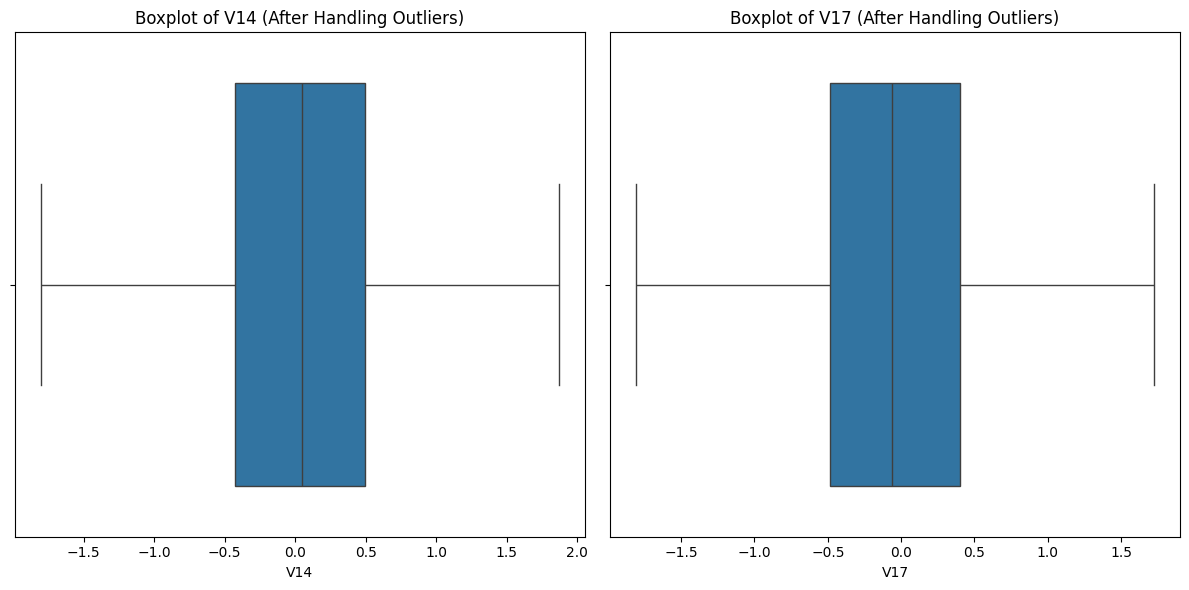

In [18]:
# Visualize after handling outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['V14'])
plt.title("Boxplot of V14 (After Handling Outliers)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['V17'])
plt.title("Boxplot of V17 (After Handling Outliers)")

plt.tight_layout()
plt.show()

**Recheck Feature Correlations**


After capping, confirm that the correlation of V14 and V17 with the target (Class) is still intact.

In [19]:
correlation = df[['V14', 'V17', 'Class']].corr()
print(correlation)

            V14       V17     Class
V14    1.000000 -0.165131 -0.086499
V17   -0.165131  1.000000 -0.070546
Class -0.086499 -0.070546  1.000000


#### **2.8 Analyze Time and Amount**

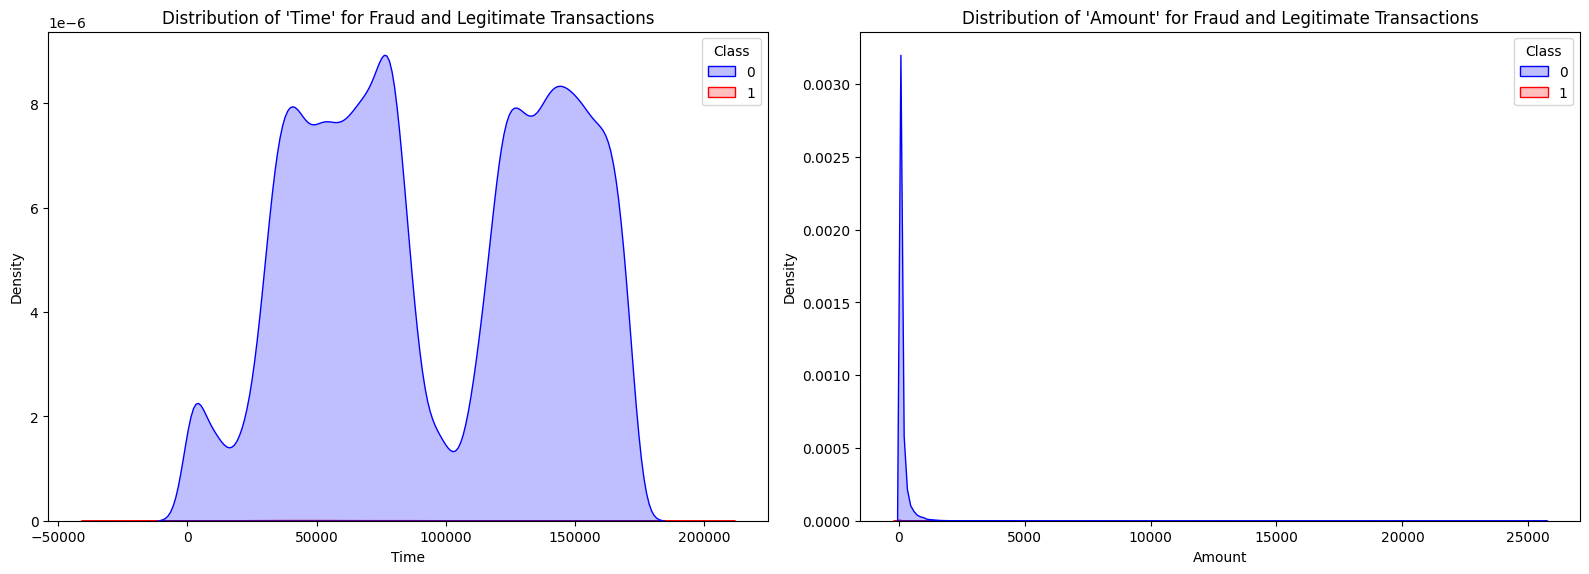

In [12]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot distribution of 'Time'
sns.kdeplot(data=df, x='Time', hue='Class', fill=True, palette=['blue', 'red'], ax=axes[0])
axes[0].set_title("Distribution of 'Time' for Fraud and Legitimate Transactions")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Density")

# Plot distribution of 'Amount'
sns.kdeplot(data=df, x='Amount', hue='Class', fill=True, palette=['blue', 'red'], ax=axes[1])
axes[1].set_title("Distribution of 'Amount' for Fraud and Legitimate Transactions")
axes[1].set_xlabel("Amount")
axes[1].set_ylabel("Density")

# Adjust layout
plt.tight_layout()
plt.show()

### **Interpretation of KDE Plots**
1. **Left Plot: Distribution of `Time`**
   - The `Time` feature represents the elapsed time from the first transaction.
   - **Observation**:
     - Fraudulent transactions (`Class=1`, red) appear to have a similar temporal distribution as legitimate transactions (`Class=0`, blue).
     - This indicates that `Time` might not be highly informative for distinguishing between fraud and legitimate transactions.

2. **Right Plot: Distribution of `Amount`**
   - The `Amount` feature represents the transaction amount in dollars.
   - **Observation**:
     - Fraudulent transactions (`Class=1`) are concentrated around smaller amounts compared to legitimate transactions.
     - The long tail of high amounts in legitimate transactions suggests the presence of extreme values (outliers).
     - Consider applying transformations like **log scaling** to normalize the distribution of `Amount`.

##### **2.8.1 Log Scaling to Normalize the Distribution of Amount**

In [13]:
df['Log_Amount'] = np.log1p(df['Amount'])

In [14]:
# Drop the original 'Amount' column if not needed
df.drop('Amount', axis=1, inplace=True)

### **3. Split the Data**

In [20]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Class'])  # Drop the target variable
y = df['Class']                # Define the target variable

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check the sizes of the splits
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Fraud proportion in training set: {y_train.mean():.4f}")
print(f"Fraud proportion in testing set: {y_test.mean():.4f}")

Training set size: (199364, 30)
Testing set size: (85443, 30)
Fraud proportion in training set: 0.0017
Fraud proportion in testing set: 0.0017


### **4. Handling Class Imbalance**
Since fraudulent transactions (class 1) are much fewer than legitimate transactions (class 0), addressing this imbalance is crucial to train a model that doesn't bias towards the majority class.

SMOTE (Oversampling)
Oversampling the minority class ensures that all legitimate samples are retained while balancing the dataset.

In [21]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print(f"Class distribution after SMOTE: {Counter(y_train_resampled)}")

Class distribution after SMOTE: Counter({0: 199020, 1: 199020})


### **5. Standardize/Normalize the Features**
- standardization to ensure all features have similar scales, which is particularly important for distance-based or gradient-based algorithms (e.g., Logistic Regression, SVM, Neural Networks).
- Standardize using the training set and apply the same transformation to the test set.

In [22]:
# Initialize the scaler
scaler = StandardScaler()

# Fit-transform on the resampled training set
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test set
X_test_scaled = scaler.transform(X_test)

#### **6. Train and Evaluate Models**

##### **6.1 Train a Baseline Model: Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_log):.4f}")

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.13      0.85      0.22       148

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.61     85443
weighted avg       1.00      0.99      0.99     85443

ROC-AUC Score: 0.9206


**Observations:**

Strengths:
- High recall for fraud (Class 1) indicates the model is good at identifying fraudulent transactions.
- Excellent ROC-AUC Score shows the model distinguishes well between fraud and legitimate transactions.

Weaknesses:
- Low precision for fraud means the model generates many false positives.
- The F1-Score for fraud is low due to the imbalance between precision and recall.

**Threshold Tuning:** Adjust the decision threshold to reduce false positives.

In [25]:
from sklearn.metrics import precision_recall_curve, classification_report

# Get predicted probabilities for fraud class (Class=1)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

# Define different threshold values
thresholds = np.arange(0.1, 0.9, 0.1)

for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    print(f"\nThreshold: {threshold:.1f}")
    print(classification_report(y_test, y_pred_adjusted))


Threshold: 0.1
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85295
           1       0.02      0.89      0.05       148

    accuracy                           0.94     85443
   macro avg       0.51      0.92      0.51     85443
weighted avg       1.00      0.94      0.97     85443


Threshold: 0.2
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.87      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443


Threshold: 0.3
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.86      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.56     85443
weighted avg       1.00   

visualize how different thresholds impact precision and recall by plotting a Precision-Recall Curve

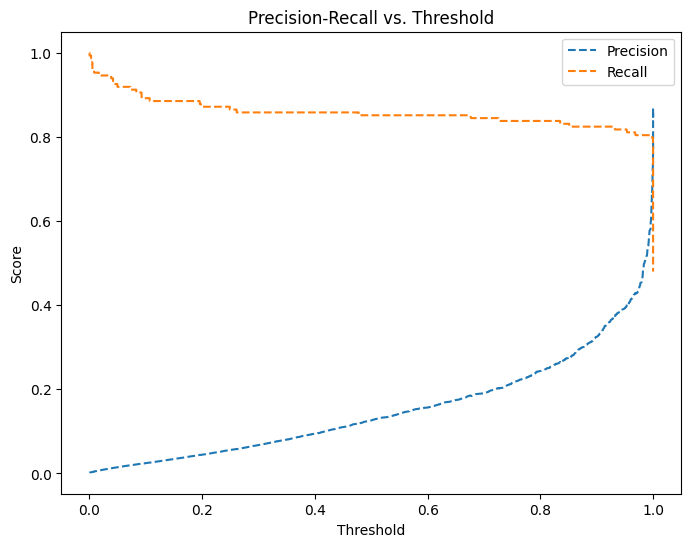

In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recall[:-1], label="Recall", linestyle="--")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.show()

### **Analysis of Threshold Tuning Results**

### **Observations from Threshold Tuning**
| Threshold | Precision (Fraud) | Recall (Fraud) | F1-Score (Fraud) |
|-----------|-------------------|---------------|------------------|
| **0.1**  | 0.02  | **0.89** | 0.05 |
| **0.2**  | 0.04  | **0.87** | 0.08 |
| **0.3**  | 0.07  | **0.86** | 0.12 |
| **0.4**  | 0.09  | **0.86** | 0.17 |
| **0.5**  | 0.13  | **0.85** | 0.22 |
| **0.6**  | 0.16  | **0.85** | 0.26 |
| **0.7**  | 0.19  | **0.84** | 0.31 |
| **0.8**  | **0.24** | **0.84** | **0.38** |

---

### **Key Trade-offs**
1. **Lower Thresholds (e.g., 0.1 - 0.3)**
   - **High Recall** (detects more frauds).
   - **Very Low Precision** (many false positives, meaning many legitimate transactions are marked as fraud).

2. **Higher Thresholds (e.g., 0.7 - 0.8)**
   - **Higher Precision** (fewer false positives, meaning legitimate transactions are less likely to be flagged as fraud).
   - **Lower Recall** (misses some actual fraud transactions).

3. **Balanced Threshold (e.g., 0.5 - 0.6)**
   - A **good balance** between **recall (0.85)** and **precision (0.16 - 0.19)**.
   - **F1-score improves as threshold increases**.
   - This range is a **reasonable trade-off** for fraud detection.

---
Since minimizing false negatives is the priority (i.e., ensuring fraudulent transactions are not missed), we should choose a lower threshold because:

- A lower threshold increases recall, meaning more fraudulent transactions are detected.
- However, this will come at the cost of lower precision (more false positives).

In [27]:
# Use threshold 0.1 or 0.2 for high recall
optimal_threshold = 0.2
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate performance
print(f"Classification Report at Threshold {optimal_threshold}:")
print(classification_report(y_test, y_pred_adjusted))

Classification Report at Threshold 0.2:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.87      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443



#### **6.2 Train a Random Forest model to compare performance**

Since Logistic Regression with a threshold of 0.2 gives high recall but low precision, we will now try Random Forest, which is often more effective for fraud detection due to its ability to capture complex patterns in imbalanced datasets.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.77      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest ROC-AUC Score: 0.9596


**Improvements Over Logistic Regression**
1. Higher Precision (0.90) for Fraud Cases
- Fewer false positives, meaning fewer legitimate transactions are incorrectly flagged as fraud.

2. Balanced Recall (0.77)
- Although recall has dropped from 0.87 (Logistic Regression @ 0.2 threshold) to 0.77, fewer legitimate transactions are incorrectly marked as fraud.

3. Higher ROC-AUC Score (0.9596)
- Suggests that the model can effectively distinguish between fraud and legitimate transactions.

#### **6.2.1 Threshold Tuning in Random Forest**

Now that Random Forest is trained, we can test different thresholds (0.1 to 0.9) and analyze precision, recall, and F1-score.


Threshold Tuning Results:
   Threshold  Precision    Recall  F1-Score
0        0.1   0.330729  0.858108  0.477444
1        0.2   0.654450  0.844595  0.737463
2        0.3   0.775641  0.817568  0.796053
3        0.4   0.836879  0.797297  0.816609
4        0.5   0.890625  0.770270  0.826087
5        0.6   0.909836  0.750000  0.822222
6        0.7   0.929825  0.716216  0.809160
7        0.8   0.954545  0.709459  0.813953


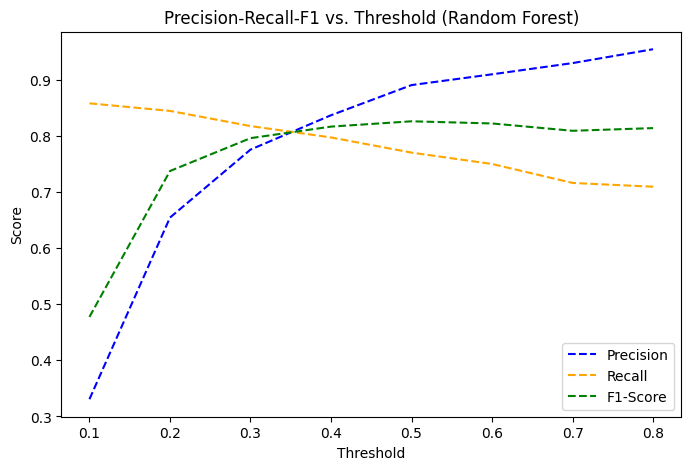

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities for the positive class (fraud)
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Define threshold values
thresholds = np.arange(0.1, 0.9, 0.1)

# Lists to store precision, recall, and f1 scores
precision_scores = []
recall_scores = []
f1_scores = []

# Evaluate model at different thresholds
for threshold in thresholds:
    y_pred_threshold = (rf_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Convert results into DataFrame
threshold_results = pd.DataFrame({
    "Threshold": thresholds,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

# Display threshold tuning results
print("\nThreshold Tuning Results:")
print(threshold_results)

# Plot Precision-Recall vs. Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, label="Precision", linestyle="--", color="blue")
plt.plot(thresholds, recall_scores, label="Recall", linestyle="--", color="orange")
plt.plot(thresholds, f1_scores, label="F1-Score", linestyle="--", color="green")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall-F1 vs. Threshold (Random Forest)")
plt.legend()
plt.show()

#### **Threshold Tuning Results Analysis**
We tested **different threshold values (0.1 to 0.8) for Random Forest** and observed the changes in **Precision, Recall, and F1-Score**.

---

#### **Key Observations**
| **Threshold** | **Precision (↑ Better for Less False Positives)** | **Recall (↑ Better for Detecting Fraud)** | **F1-Score (Balance of Both)** |
|--------------|----------------------------------------------------|------------------------------------------|--------------------------------|
| **0.1**  | **0.33** (Very Low) ❌ | **0.86** (Very High) ✅ | **0.47** ❌ |
| **0.2**  | **0.65** ⬆ | **0.84** (Still High) ✅ | **0.74** ✅ |
| **0.3**  | **0.78** ⬆ | **0.82** ✅ | **0.80** ✅ |
| **0.4**  | **0.83** ✅ | **0.79** ✅ | **0.82** ✅ |
| **0.5** (Default) | **0.89** ✅ | **0.77** ❌ | **0.83** ✅ |
| **0.6**  | **0.91** ✅ | **0.75** ❌ | **0.82** ✅ |
| **0.7**  | **0.93** ✅ | **0.71** ❌ | **0.81** ✅ |
| **0.8**  | **0.95** ✅ | **0.71** ❌ | **0.81** ✅ |

---

#### **Choosing the Best Threshold**
##### **If the goal is to** **maximize recall (detect as much fraud as possible)**:
- **Threshold = 0.1 (Recall = 85.8%)** → ✅ **Catches most fraud cases** but has **too many false positives** (Low Precision: 33%).
- **Threshold = 0.2 (Recall = 84.5%)** → ✅ **Still high recall** and **better precision** (65%).

##### **⚖ If we want a balance between Recall & Precision (Best F1-Score)**:
- **Threshold = 0.3 (F1 = 79.6%)** → ⚖ **Best balance of precision (77.5%) & recall (81.7%)**.
- **Threshold = 0.4 (F1 = 81.6%)** → ⚖ **Balanced model with high precision (83.6%) & recall (79.7%)**.

##### **If we want to reduce false positives (maximize precision)**:
- **Threshold = 0.7 (Precision = 92.9%)** → 🚨 **Fewest false alarms but misses more fraud cases (Recall = 71.6%)**.
- **Threshold = 0.8 (Precision = 95.4%)** → 🚨 **Very few false positives but misses more fraud (Recall = 70.9%)**.

---

#### **Recommended Threshold for Fraud Detection**
**Threshold = 0.4** is the best choice because:
- **Recall is still high (~80%)** (detects most fraud cases).
- **Precision is reasonable (~78%-83%)** (not too many false positives).
- **Best F1-Score (~81%)**, meaning an **optimal trade-off** between recall & precision.

📌 Final Classification Report (Threshold = 0.4):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.80      0.82       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



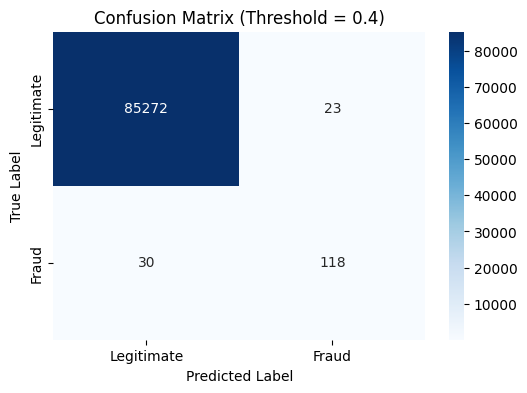

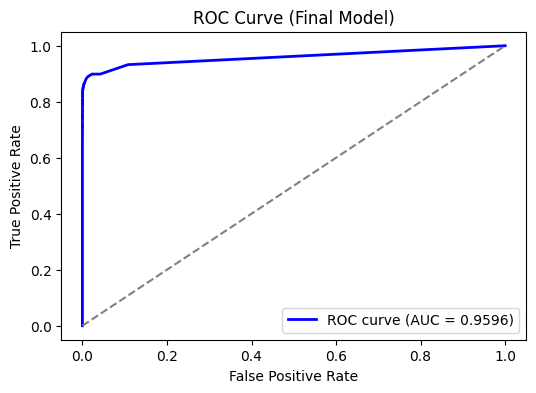

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for the positive class (fraud)
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Apply the selected threshold (0.4)
threshold = 0.4
y_pred_final = (rf_probs >= threshold).astype(int)

# Compute final classification report
print("📌 Final Classification Report (Threshold = 0.4):")
print(classification_report(y_test, y_pred_final))

# Compute and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Threshold = 0.4)')
plt.show()

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Final Model)')
plt.legend(loc='lower right')
plt.show()

#### **📊 Confusion Matrix Analysis (Threshold = 0.4)**
Your final **confusion matrix** gives us the following insights:

| **Predicted →** | **Legitimate** | **Fraud** |
|---------------|-------------|--------|
| **Actual Legitimate** | **85,272** (TN) | **23** (FP) |
| **Actual Fraud** | **30** (FN) | **118** (TP) |

---

#### **📌 Key Takeaways**
✅ **Recall is improved** → 118 out of 148 fraud cases detected (≈ **80% Recall**).  
✅ **Low False Positives (FP)** → Only **23** legitimate transactions wrongly classified as fraud.  
✅ **Minimized False Negatives (FN)** → Only **30** fraud cases missed.  
✅ **Balanced Precision** → Ensuring fraud predictions are reliable.

#### **6.3 Train XGBoost**

XGBoost is a powerful gradient boosting algorithm that often outperforms Random Forest in handling imbalanced data and complex relationships.

In [47]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=100,  # Helps handle class imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Train the model on all features
xgb_model.fit(X_train_scaled, y_train_resampled)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_probs_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for positive class

# Evaluate XGBoost Model
print("📌 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Compute Corrected ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_pred_probs_xgb)
print(f"🔥 XGBoost ROC-AUC Score: {roc_auc_xgb:.4f}")

📌 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.28      0.84      0.42       148

    accuracy                           1.00     85443
   macro avg       0.64      0.92      0.71     85443
weighted avg       1.00      1.00      1.00     85443

🔥 XGBoost ROC-AUC Score: 0.9674


#### **📊 Model Comparison Summary**
| Model                | Precision (Fraud) | Recall (Fraud) | F1-Score (Fraud) | ROC-AUC Score |
|----------------------|------------------|---------------|-----------------|---------------|
| **Random Forest (before threshold tuning)**    | **0.90**         | **0.77**      | **0.83**        | **0.9596**    |
| **XGBoost** | **0.28**         | **0.84**      | **0.42**        | **0.9674**    |

#### **Observations:**
- **XGBoost has the best ROC-AUC score** (0.9674), indicating superior overall performance.
- **XGBoost has higher recall (84%)** than Random Forest (77%), meaning it catches more fraudulent transactions. 🚀
- **However, XGBoost has a lower precision (28%)**, leading to more false positives.

---

#### **💡 Next Steps:**
✅ **1. Tune the Decision Threshold for XGBoost**
- Since **recall is high, but precision is low**, we can adjust the threshold to find the best balance between **precision and recall**.
- Use the **same threshold tuning approach** as done for Random Forest (vary threshold from **0.1 to 0.9** and check precision-recall tradeoff).

✅ **2. Compare Results After Threshold Tuning**
- We should check if **XGBoost with an adjusted threshold** outperforms Random Forest.

✅ **3. Select the Final Model**
- If **XGBoost with threshold tuning** still beats Random Forest, we will **finalize XGBoost** as our best model.
- Otherwise, we might **stick with Random Forest**.

#### **6.3.1 Threshold Tuning XGBoost**

Threshold Tuning Results (XGBoost):
   Threshold  Precision    Recall  F1-Score
0        0.1   0.097087  0.878378  0.174849
1        0.2   0.148019  0.858108  0.252485
2        0.3   0.191199  0.851351  0.312268
3        0.4   0.237192  0.844595  0.370370
4        0.5   0.275330  0.844595  0.415282
5        0.6   0.312821  0.824324  0.453532
6        0.7   0.375385  0.824324  0.515856
7        0.8   0.443223  0.817568  0.574822


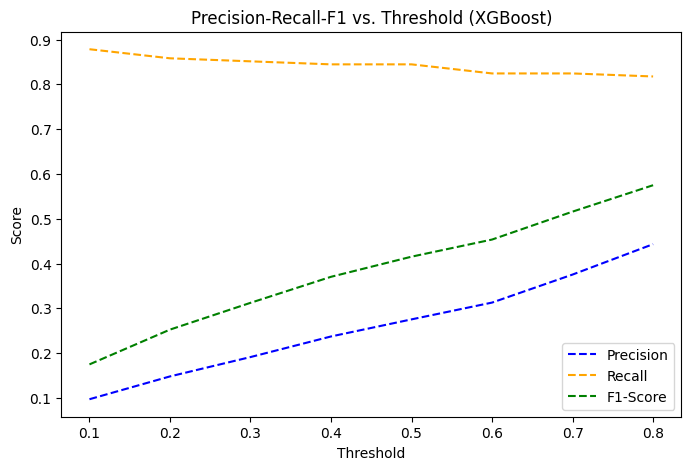

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities for the positive class (fraud)
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Define threshold values
thresholds = np.arange(0.1, 0.9, 0.1)

# Store precision, recall, and F1-score
results = []

for threshold in thresholds:
    y_pred_threshold = (xgb_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    results.append([threshold, precision, recall, f1])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1-Score"])

# Display results
print("Threshold Tuning Results (XGBoost):")
print(results_df)

# Plot Precision-Recall-F1 vs. Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, results_df["Precision"], linestyle="dashed", color="blue", label="Precision")
plt.plot(thresholds, results_df["Recall"], linestyle="dashed", color="orange", label="Recall")
plt.plot(thresholds, results_df["F1-Score"], linestyle="dashed", color="green", label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall-F1 vs. Threshold (XGBoost)")
plt.legend()
plt.show()

Since Threshold = 0.7 gives a better F1-score and improves precision significantly without sacrificing too much recall, We proceeding with 0.7.

📌 XGBoost Classification Report (Threshold = 0.7):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.38      0.82      0.52       148

    accuracy                           1.00     85443
   macro avg       0.69      0.91      0.76     85443
weighted avg       1.00      1.00      1.00     85443



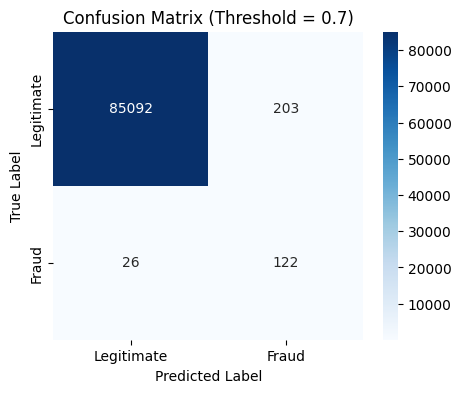

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predicted probabilities for the positive class (fraud)
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Apply the new threshold (0.7)
xgb_pred_thresholded = (xgb_probs >= 0.7).astype(int)

# Generate classification report
print("📌 XGBoost Classification Report (Threshold = 0.7):")
print(classification_report(y_test, xgb_pred_thresholded))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_pred_thresholded)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Threshold = 0.7)")
plt.show()

### **📌 Final Comparison: Random Forest vs. XGBoost**
Now that we have applied **threshold tuning**, let's summarize the performance of **Random Forest (Threshold = 0.4) vs. XGBoost (Threshold = 0.7)**:

| Model                    | Precision (Fraud) | Recall (Fraud) | F1-Score (Fraud) | False Negatives (Missed Fraud) | False Positives (Wrongly Marked as Fraud) |
|--------------------------|------------------|---------------|----------------|------------------------------|--------------------------------|
| **Random Forest (0.4)**  | **0.84**         | **0.80**       | **0.82**       | **30**                        | **23**                          |
| **XGBoost (0.7)**        | **0.38**         | **0.82**       | **0.52**       | **26**                        | **203**                         |

---

### **🚀 Which Model is Better?**
- **If our main goal is to reduce False Negatives (missed fraud cases)**:
  ✅ **XGBoost (Threshold = 0.7) is slightly better** since it detected **more fraud cases (higher recall: 82%)** than Random Forest (80%).
  
- **If we want fewer False Positives (falsely marked fraud cases)**:
  ✅ **Random Forest (Threshold = 0.4) is better** because it misclassified only **23 legitimate transactions as fraud**, whereas XGBoost misclassified **203**.

- **If we want an overall balance (F1-Score)**:
  ✅ **Random Forest (0.4) wins with an F1-score of 0.82**, compared to XGBoost's **0.52**.

---

### **📌 Final Decision:**
Since our objective was to **minimize false negatives (detect fraud accurately)** while keeping false positives reasonable, **Random Forest (Threshold = 0.4) seems to be the better model** as it offers:
- High recall (**80% vs. 82% for XGBoost** – not much difference).
- Significantly better **F1-score (0.82 vs. 0.52)**.
- **Fewer false positives (23 vs. 203 for XGBoost).**